In [2]:
from math import exp, log, cos, sin, tan, e
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import pandas as pd

In [3]:
f = lambda x: 3.6*(4-np.exp((-x**2)/9.4))-10*x
f = lambda x: 3*(x**3) - (7*x) + 5
raíz = optimize.fsolve(f, 1)
x_1 = np.linspace(0, raíz, num=500)
x_2 = np.linspace(raíz, 1, num=500)
x_3 = np.linspace(1, 2, num=500)
x_4 = np.append(x_1, x_2)
x_5 = np.append(x_4, x_3)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'Raíz de Función')

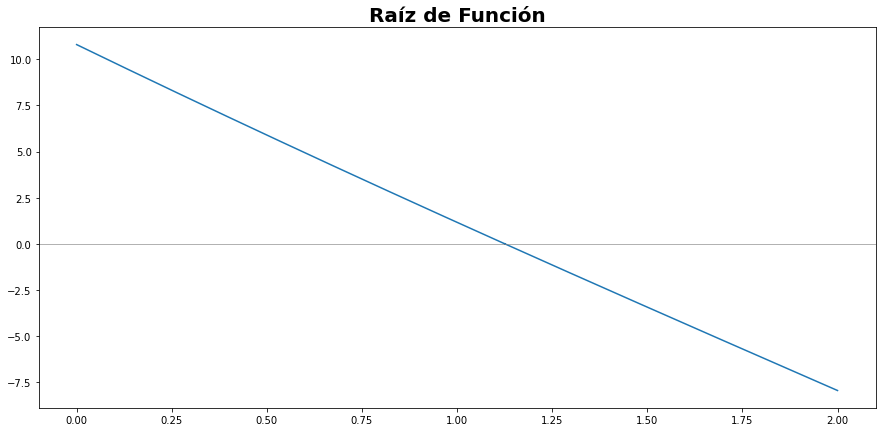

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(x_5, f(x_5))
plt.axhline(0, color='gray', lw=0.6)
plt.title('Raíz de Función', fontsize=20, fontweight="bold")

In [5]:
def igual_signo(a, b):
    # Función para saber si ambos números son positivos
    return a * b > 0

def biseccion(f, a, b, pasos):
    raices = []
    resultados = []
    error_relativo = [None]
    paso_anterior = None
    # iniciar variables a analizar
    for paso in range(pasos):
        # iterar sobre número de pasos
        medio = (a + b) / 2.0
        # CaLcular primer punto medio
        if igual_signo(f(a), f(medio)):
        # Si tienen mismo signo f(primer punto medio) y f(punto de inicio) entonces punto de inicio = medio
            a = medio
        else:
        # Sino punto final = medio
            b = medio
        raices.append(medio)
        resultados.append(f(medio))
        if not paso_anterior:
            pass
        else:
            error_relativo.append((np.absolute(medio - paso_anterior)) / medio)
        paso_anterior = medio
    # Agregar punto medio a variable paso anterior para computar los errores relativos posteriores  
    return raices, resultados, error_relativo

def newton(f, x, x_n):
    #Función de apoyo para obtener derivada de la función y retornar fórmula que permite la busqueda de la raíz de la función
    slope = derivative(f, x_n, dx=0.1)
    return x_n - f(x_n) / slope

def calcular_newton(f, x, x_n, pasos):
    raices = []
    resultados = []
    error_relativo = [None]
    paso_anterior = None
    for n in range(pasos):
        x_n = newton(f, x, x_n)
        raices.append(x_n)
        resultados.append(f(x_n))
        if not paso_anterior:
            pass
        else:
            error_relativo.append((np.absolute(x_n - paso_anterior)) / x_n)
        paso_anterior = x_n
    
    return raices, resultados, error_relativo

def secante(f,x_0,x_1,pasos):
    raices = []
    resultados = []
    error_relativo = [None]
    paso_anterior = None
    for paso in range(pasos):
        # Por cada paso
        x_2 = x_0 - (x_1-x_0) * f(x_0)/( f(x_1) - f(x_0) )
        # Obtener fórmula de método secante
        if f(x_0) * f(x_2) < 0:
            x_1 = x_2
        else:
            x_0 = x_2
        raices.append(x_2)
        resultados.append(f(x_2))
        if not paso_anterior:
            pass
        else:
            error_relativo.append((np.absolute(x_2 - paso_anterior))  / x_2)
        paso_anterior = x_2

    return raices, resultados, error_relativo
    
def regula_falsi(f,a,b,pasos):
    raices = []
    resultados = []
    error_relativo = [None]
    paso_anterior = None
    primer_valor = f(a)
    for paso in range(pasos):
        # Por cada paso
        p = (a*f(b)-b*f(a))/(f(b) - f(a))
        # Obtener fórmula para método regula falsi
        paso_siguiente = f(p)
        if primer_valor*paso_siguiente > 0:
            a = p
        else:
            b = p
        raices.append(p)
        resultados.append(paso_siguiente)
        if not paso_anterior:
            pass
        else:
            error_relativo.append((np.absolute(p - paso_anterior)) / p)
        paso_anterior = p
    return raices, resultados, error_relativo

def crear_tabla(resultados):
    # Crear tabla (DataFrame) a partir de resultados en el formato requerido
    tabla = pd.DataFrame.from_dict(resultados)
    return tabla

In [12]:
resultados_b = biseccion(f, -2, 0, pasos=20)
resultados_n = calcular_newton(f, 1, 0, pasos=11)
resultados_s = secante(f, 0, 2, pasos=11)
resultados_rf = regula_falsi(f, 0, 2, pasos=11)

resultados_bisección = {
    "niter":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    "raíz":resultados_b[0],
    "f(raíz)":resultados_b[1],
    "error relativo%":resultados_b[2]
}

resultados_newton = {
    "niter":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "raíz":resultados_n[0],
    "f(raíz)":resultados_n[1],
    "error relativo%":resultados_n[2]
}

resultados_secante = {
    "niter":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "raíz":resultados_s[0],
    "f(raíz)":resultados_s[1],
    "error relativo%":resultados_s[2]
}

resultados_regula_falsi = {
    "niter":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "raíz":resultados_rf[0],
    "f(raíz)":resultados_rf[1],
    "error relativo%":resultados_rf[2]
}

In [13]:
tabla_b = crear_tabla(resultados_bisección)
tabla_b

,niter,raíz,f(raíz),error relativo%
0,0,-1.000000,9.000000,NaN
1,1,-1.500000,5.375000,-0.333333
2,2,-1.750000,1.171875,-0.142857
3,3,-1.875000,-1.650391,-0.066667
4,4,-1.812500,-0.175537,-0.034483
5,5,-1.781250,0.513824,-0.017544
6,6,-1.796875,0.173092,-0.008696
7,7,-1.804688,-0.000231,-0.004329
8,8,-1.800781,0.086678,-0.002169
9,9,-1.802734,0.043285,-0.001083


In [ ]:
tabla_n = crear_tabla(resultados_newton)
tabla_n

,niter,raíz,f(raíz),error relativo%
0,0,1.080000,4.201032e-01,NaN
1,1,1.125319,5.479657e-04,4.027172e-02
2,2,1.125378,4.406021e-08,5.265437e-05
3,3,1.125378,3.476330e-12,4.233787e-09
4,4,1.125378,0.000000e+00,3.340403e-13
5,5,1.125378,0.000000e+00,0.000000e+00
6,6,1.125378,0.000000e+00,0.000000e+00
7,7,1.125378,0.000000e+00,0.000000e+00
8,8,1.125378,0.000000e+00,0.000000e+00
9,9,1.125378,0.000000e+00,0.000000e+00


In [ ]:
tabla_s = crear_tabla(resultados_secante)
tabla_s

,niter,raíz,f(raíz),error relativo%
0,0,1.151857,-2.446790e-01,NaN
1,1,1.126340,-8.894865e-03,2.265546e-02
2,2,1.125413,-3.244665e-04,8.235986e-04
3,3,1.125379,-1.183733e-05,3.004319e-05
4,4,1.125378,-4.318564e-07,1.096049e-06
5,5,1.125378,-1.575524e-08,3.998670e-08
6,6,1.125378,-5.747935e-10,1.458819e-09
7,7,1.125378,-2.096989e-11,5.322152e-11
8,8,1.125378,-7.656098e-13,1.941695e-12
9,9,1.125378,-2.664535e-14,7.103042e-14


In [ ]:
tabla_rf = crear_tabla(resultados_regula_falsi)
tabla_rf

,niter,raíz,f(raíz),error relativo%
0,0,1.151857,-2.446790e-01,NaN
1,1,1.126340,-8.894865e-03,2.265546e-02
2,2,1.125413,-3.244665e-04,8.235986e-04
3,3,1.125379,-1.183733e-05,3.004319e-05
4,4,1.125378,-4.318564e-07,1.096049e-06
5,5,1.125378,-1.575524e-08,3.998670e-08
6,6,1.125378,-5.747935e-10,1.458819e-09
7,7,1.125378,-2.096989e-11,5.322152e-11
8,8,1.125378,-7.656098e-13,1.941695e-12
9,9,1.125378,-2.664535e-14,7.103042e-14


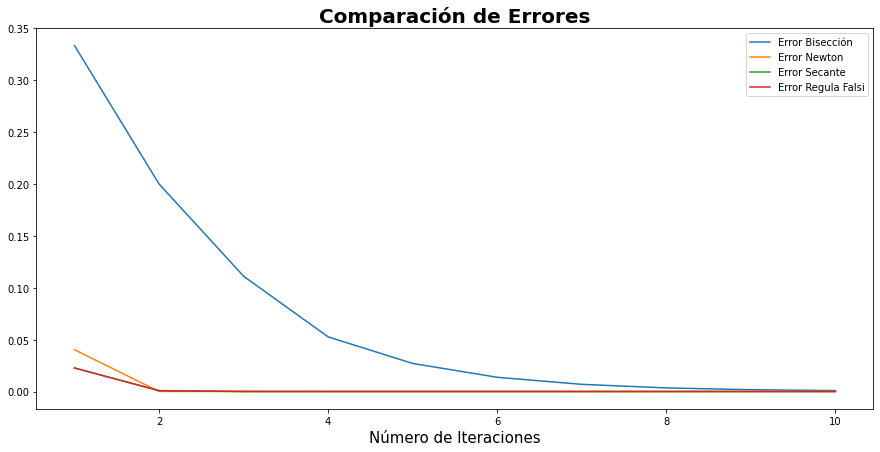

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(tabla_b['error relativo%'], label="Error Bisección")
plt.plot(tabla_n['error relativo%'], label="Error Newton")
plt.plot(tabla_s['error relativo%'], label="Error Secante")
plt.plot(tabla_rf['error relativo%'], label="Error Regula Falsi")

plt.legend()
plt.title("Comparación de Errores", fontsize=20, fontweight="bold")
plt.xlabel("Número de Iteraciones", fontsize=15)
plt.show()

## Teoría

Método de Bisección

### Método de Newton-Raphson

Según José Fernández (2006) **"**Este método, el cual es un método iterativo, es uno de los más usados y
efectivos. A diferencia de los métodos anteriores, el método de Newton-Raphson
no trabaja sobre un intervalo sino que basa su fórmula en un proceso iterativo, y se basa en la fórmula $x_{n+1}=x_n - \frac{f(x_n)}{f'(x)}$**"**. 



### Método de Bisección

Según José Fernández (2006) El método de bisección está basado en una propiedad bien conocida de las funciones continuas, el teorema del valor medio. Este método se emplea para determinar una raíz $f(x) = 0$ en un intervalor $[a, b]$ ... el método de bisección se emplea de la siguiente manera: si $f(a)f(b)<0$ entonces $c = (a+b)/2$ y luego averiguamos si $f(a)f(b)>0$ si lo es entonces hay una raíz en el intervalo $[a, b]$

### Método de Secante


Según Jorge Fernández (2006) El método de Newton converge rápidamente, pero necesita evaluar la derivada de la función en cada paso y es muy sensible al valor inicial. Para superar esta dificultad se puede reemplazar $f'(x_n)$ en la expresión del método de Newton por el cociente de las diferencias

$f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$

### Método de Regula Falsi

De acuerdo a Cristian Castro (2003) El método de la falsa posición se puede entender como un intento por mejorar
las características de convergencia del método de bisección. Se comienza con
valores limitantes $a$ y $b$ tales que $f(x)$ cambia de signo sólo una vez en el
intervalo de $a$ a $b$.
Por interpolación lineal se encuentra una raíz aproximada entre $a$ a $b$ que
sirve como valor intermedio. El nuevo intervalo que contiene la raíz
comprende ahora de $a$ a $x_{intermedio}$ o de $x_{intermedio}$ a $b$. El razonamiento para
determinar que intervalo se retiene es le mismo que para el método de
bisección. 

## Análisis

De los resultados obtenidos se evidencia que la utilización del método de Newton-Raphson resulta en menor tiempo de convergencia comparado con los demás y su error es por ende menor, por lo que el método de Newton-Raphson se estipula como una solución **aceptable** para la búsqueda de la raíz de la función. Sin embargo, es importante añadir que, como lo afirma Jorge Fernández (2006), es necesario tener en cuenta que la convergencia depende en gran medida del punto seleccionado al principio, y que por eso la solución a través del Método de Secante ofrece soluciones con mayor capacidad de generalización.

Bibliografía


*   Cristian Castro, Métodos Numéricos, Primera Edición, 2003
*   Jorge Fernández, Iniciación a los Métodos Numéricos, Segunda Edición, 2006
